# Exercise: PCA on Neural data

In this exercise, you'll examine a neural dataset and replicate a figure from Russo et al. 2020. In this article, Russo et al. examined neural representations in the Supplementary Motor Area (SMA) and Motor Cortex (M1) while monkeys performed a task involving cycling a hand pedal some number of times.

<img src="images/russo-task.jpg" width="80%" />

They find really interesting (and beautiful) structure in M1 (Fig. A and B below, each for a different monkey) and SMA (Fig. C and D below, each also for a different monkey) using a Principal Components Analysis. The top PCs represent the seven cycles monkeys had to perform to accomplish the task, though SMA's representation seems to additionally reflect time or task progress.

<img src="images/russo-manifold.jpg" width="80%" />

Abigail A. Russo, ..., Mark M. Churchland,
(2020) Neural Trajectories in the Supplementary Motor Area and Motor Cortex Exhibit Distinct Geometries, Compatible with Different Classes of Computation. Neuron.


## Exercise

In this exercise, you'll replicate the above figure.

We'll download the data from [Russo's GitHub](https://github.com/aarusso/trajectory-divergence#datasets) which includes details on the data format. You can run the below cell to download the data.

In [9]:
!curl -sL https://github.com/aarusso/trajectory-divergence/raw/master/M1_sampleData.mat -o M1_sampleData.mat
!curl -sL https://github.com/aarusso/trajectory-divergence/raw/master/SMA_sampleData.mat -o SMA_sampleData.mat

Now we'll load the data for the SMA. It's a bit cumbersome in Python, so below I've made sure all of Russo's notes from GitHub are included.

Our neural data is set to a variable below and has shape 5330 (number of time units) x 77 (number of neurons). We're ultimately looking to reduce the dimensionality in terms of neurons.

In [10]:
from scipy.io import loadmat
import sklearn.decomposition
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [11]:
data = loadmat('SMA_sampleData.mat', squeeze_me=True)['D_sma']
print('SMA keys:', data.dtype)

neural_data = data['A'][0]
print('neural data shape', neural_data.shape)

SMA keys: [('A', 'O'), ('times', 'O'), ('analyzeTimes', 'O'), ('epochColors', 'O'), ('epochStarts', 'O'), ('condition', 'O')]
neural data shape (5330, 77)


Now we can do PCA! Refer back to lecture to choose a way to implement this. Think carefully about what dimensionality of your input to PCA; We want to preserve the time dimension (size 5330), while reducing the dimensionality of the nueral dimension (size 77). If you're using `sklearn`, check out the documentation for `PCA.fit()` [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit), you'll have to think about what our "samples" and "features" are. Make sure that you understand the shape of your principal components, which you can access with `.components_` after running `fit()` on an instance of `PCA()`.

In [12]:
# ANSWER
pca = sklearn.decomposition.PCA()
pca.fit(data['A'][0].T)
print(pca.components_.shape)

(77, 5330)


Now, try plotting the top PCs! You can try plotting them in 2D, or adapt this example code to plot in 3D
```python
f = plt.figure()
ax = f.add_subplot(111, projection='3d')
ax.plot(x, y, z) # add your 3 PCs here, replace x, y, z
ax.view_init(elev=45, azim=45) # You can change the angle of rendering here
```

If you're plotting in 3D, you may need to adjust the angle of rendering.

Bonus: find a way to get the color of the line to change over time. A good guide for multicolored 2D lines is [here](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/multicolored_line.html), and one for multicolored 3D lines is [here](https://stackoverflow.com/a/22079775). An alternative is to simply draw a line between each pair of time points, changing the color based on the current timepoint.

**Question**: What do the top 3 PCs seem to represent?

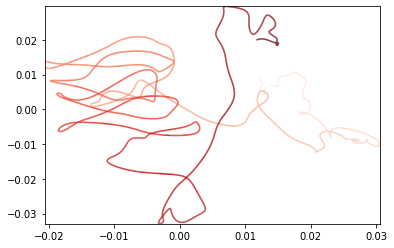

In [13]:
# ANSWER
from matplotlib.collections import LineCollection

x = pca.components_[1]
y = pca.components_[2]

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

lc = LineCollection(segments, cmap='Reds')
lc.set_array(np.arange(pca.components_.shape[1]))
f, ax = plt.subplots()
ax.add_collection(lc)
plt.xlim([x.min(), x.max()])
plt.ylim([y.min(), y.max()]);


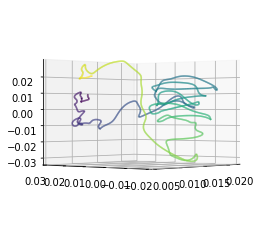

In [14]:
# ANSWER
from mpl_toolkits.mplot3d.art3d import Line3DCollection

pcs = pca.components_[:3].T
segments = np.stack([pcs[1:], pcs[:-1]], axis=1)
lc = Line3DCollection(segments, cmap='viridis')
lc.set_array(np.arange(pca.components_.shape[1])) # For colors

f = plt.figure()
ax = f.add_subplot(111, projection='3d')
ax.add_collection(lc)
ax.view_init(elev=0, azim=220)
ax.set(
    xlim=[pcs[:, 0].min(), pcs[:, 0].max()],
    ylim=[pcs[:, 1].min(), pcs[:, 1].max()],
    zlim=[pcs[:, 2].min(), pcs[:, 2].max()],
);
